<style>
    /* Change the background color */
    body { background-color: #f0f0f0; }

    /* Style markdown headings */
    h1 { color: #0066cc; }
    h2 { color: #009933; }
    h3 { color: #ff6600; }

    /* Style code cells */
    .input_area { background-color: #e6f2ff; }

    /* Style output area */
    .output_area { background-color: #ffffff; }
    
    /* Set border for dataframes */
    .dataframe { border: 2px solid #000; }

    /* Add padding and shadows to cells */
    .cell { padding: 10px; box-shadow: 2px 2px 8px rgba(0,0,0,0.1); }

</style>



In [1]:
from IPython.core.display import display, HTML

display(HTML('''
<style>
    body { background-color: #f0f0f0; }
    h1 { color: #0066cc; }
    h2 { color: #009933; }
    h3 { color: #ff6600; }
    .input_area { background-color: #e6f2ff; }
    .output_area { background-color: #ffffff; }
    .dataframe { border: 2px solid #000; }
    .cell { padding: 10px; box-shadow: 2px 2px 8px rgba(0,0,0,0.1); }
</style>
'''))

C:\Users\mundl\AppData\Local\Temp\ipykernel_21076\4166012515.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# <center> <span style="color: #2C3E50; font-family: 'Arial', sans-serif; font-size: 36px; font-weight: bold;">🚨 Unmasking Fraud: A Data-Driven Approach to Financial Security</span> </center>

## <center> <span style="color: #2980B9; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: semi-bold;">Leveraging Machine Learning for Transaction Integrity</span> </center>

# Table of Contents

1. [Introduction](#Introduction)
2. [Model Building: A Car Journey](#Model-Building-A-Car-Journey)
3. [Data Cleaning](#Data-cleaning)
4. [Fraud Detection Model](#Fraud-Detection-Model)
5. [Variable Selection](#Variable-Selection)
6. [Model Performance](#Model-Performance)
7. [Key Predictors of Fraud](#key-Predictors-of-Fraud)
8. [Validity of Factors](#Validity-of-Factors)
9. [Infrastructure Updates](#Infrastructure-Updates)
10. [Evaluating Effectiveness](#Evaluating-Effectiveness)
11. [Conclusion](#Conclusion)
12. [Fun Learning](#Fun-Learning)

# Introduction


<div style="text-align: right;">
    <img src="https://cylynx.imgix.net/uploads/fraudml-detection-cover.png" alt="Cat" width="700"/>

</div>



## Fraud Detection in Financial Transactions

Fraudulent transactions pose a significant threat to the financial industry, leading to substantial economic losses and undermining consumer trust. In response to this pressing issue, this project aims to develop a robust model for predicting fraudulent transactions using a comprehensive dataset of financial activities.

### Objectives
1. **Data Cleaning**
   
2. **Fraud Detection Model**
   
3. **Variable Selection**
   
4. **Model Performance**
   

5. **Key Predictors of Fraud**
   

6. **Validity of Factors**
   
7. **Infrastructure Updates**
  
8. **Evaluating Effectiveness**
   
### Methodology
This project will utilize a dataset containing over 6 million transactions, encompassing various attributes such as transaction type, amount, and account balances. Statistical analysis and machine learning techniques will be employed to extract meaningful features and build predictive models. The evaluation will focus on metrics such as precision, recall, and F1-score to ensure the model's effectiveness in detecting fraud.

### Significance
The outcomes of this project hold significant importance for financial institutions, enabling them to proactively identify and mitigate fraudulent activities. By implementing a data-driven approach to fraud detection, organizations can enhance their security measures, protect their customers, and maintain trust in their services.

---

*This analysis contributes to the ongoing efforts in the financial sector to combat fraud, leveraging advanced analytics and machine learning for a safer transactional environment.*


# Importing Libraries

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,roc_curve, roc_auc_score, precision_recall_curve

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [5]:
# reading data
df = pd.read_csv('/kaggle/input/fraud-transaction/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Description 

Data description is a fundamental step in the data analysis process that provides valuable insights into the dataset's structure, quality, and characteristics. By thoroughly describing the data, you can enhance understanding, improve decision-making, and ensure effective modeling in your project.

- **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).



- **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- **amount** - amount of the transaction in local currency.

- **nameOrig** - customer who started the transaction

- **oldbalanceOrg** - initial balance before the transaction

- **newbalanceOrig** - new balance after the transaction

- **nameDest** - customer who is the recipient of the transaction

- **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start   with M (Merchants).

- **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with   M (Merchants).

- **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the       fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Data Cleaning Process

Data cleaning is a crucial step in preparing the dataset for analysis and modeling. In this project, the following processes were implemented to ensure the quality and reliability of the data:

### 1. Handling Missing Values
- **Identification**: Missing values were identified using techniques such as `.isnull()` and `.info()` methods in Python to understand their distribution across different columns.
- **Imputation**: Depending on the nature of the data:
  - **Numerical Features**: Missing values were filled using the mean or median of the respective feature to maintain statistical integrity.
  - **Categorical Features**: For categorical variables, missing values were replaced with the mode or a new category labeled "Unknown."
- **Removal**: If a feature had a high percentage of missing values (e.g., more than 30%), it was considered for removal from the dataset, as it may not provide useful information.

### 2. Handling Outliers
- **Detection**: Outliers were detected using statistical methods, including:
  - **Z-score**: Values with a Z-score greater than 3 or less than -3 were flagged as potential outliers.
  - **Interquartile Range (IQR)**: Values beyond 1.5 times the IQR (upper and lower bounds) were also considered outliers.
- **Treatment**: Depending on the context:
  - **Capping**: Outliers were capped at the upper and lower limits (e.g., 95th and 5th percentiles) to reduce their impact on the model.
  - **Removal**: In cases where outliers were clearly errors or artifacts, they were removed from the dataset.

### 3. Handling Multi-collinearity
- **Correlation Analysis**: A correlation matrix was generated to identify highly correlated features (correlation coefficient above 0.75).

- **Feature Selection**: To mitigate multi-collinearity:
  - Highly correlated features were analyzed for redundancy, and only one feature from each correlated pair was retained based on domain knowledge and feature importance.
  - Dimensionality reduction techniques, such as Principal Component Analysis (PCA), were considered to combine correlated features into a single component when appropriate.

By systematically addressing these aspects of data cleaning, the dataset was refined to enhance its quality and suitability for further analysis and modeling.

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- we found No missing values in our data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.duplicated().sum()

0

-  No duplicate values in our data

In [9]:
#  optimizing data types
df['amount'] = df['amount'].astype('int32')

# Variable Selection
## Feature Engineering

<div style="text-align: right;">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20231220095556/Feature-Engineering.png" alt="" width="700" height="400">
</div>


Feature engineering is a vital aspect of the machine learning pipeline that involves selecting, transforming, and creating features to improve model performance. By leveraging domain knowledge and appropriate techniques, you can enhance the predictive power of your models and achieve better outcomes.

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


- dropping nameOring & nameDest , as they are not much necessary 

In [11]:
df = df.drop(columns=['nameOrig', 'nameDest'])

- Creating new feature , balance_diffOrg  and balance_diffDest .

In [12]:
df['balance_diffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_diffDes'] = df['oldbalanceDest'] - df['newbalanceDest']

df = df.drop(columns=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])

df['balance_diffOrg'] = df['balance_diffOrg'].astype('int32')
df['balance_diffDes'] = df['balance_diffDes'].astype('int32')

In [13]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud,balance_diffOrg,balance_diffDes
0,1,PAYMENT,9839,0,0,9839,0
1,1,PAYMENT,1864,0,0,1864,0
2,1,TRANSFER,181,1,0,181,0
3,1,CASH_OUT,181,1,0,181,21182
4,1,PAYMENT,11668,0,0,11668,0


# Visualizing the Data

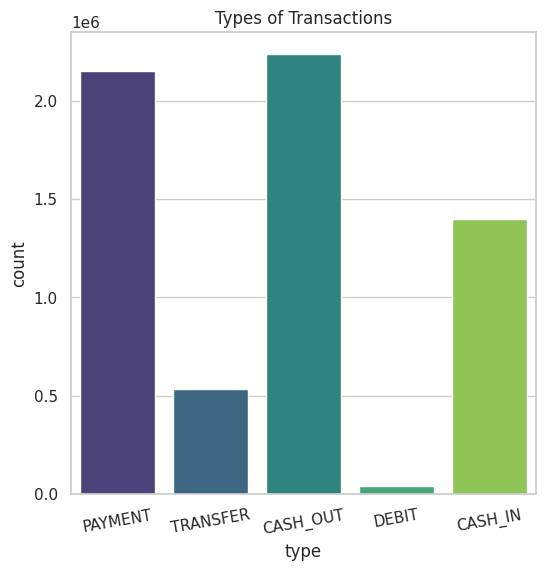

In [14]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,6))
sns.countplot(x = df['type'],palette='viridis')
plt.title('Types of Transactions')
plt.xticks(rotation=10)
plt.show()

- We can observe CASH_OUT & PAYMENT has more transactions than others
- DEBIT  transactions are in less number 

In [15]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

- data is Highly imbalanced

In [16]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

**Encoding the Categorical columns to Numeric**

Encoding data to numeric values is essential for making it suitable for machine learning algorithms. It ensures that the data is interpretable, memory-efficient, and capable of capturing meaningful patterns that can enhance model performance.

In [17]:
#  using LabelEncoder to encode the data from categorical to numeric
label_en = LabelEncoder()

df['type'] = label_en.fit_transform(df['type'])

df.head()

,step,type,amount,isFraud,isFlaggedFraud,balance_diffOrg,balance_diffDes
0,1,3,9839,0,0,9839,0
1,1,3,1864,0,0,1864,0
2,1,4,181,1,0,181,0
3,1,1,181,1,0,181,21182
4,1,3,11668,0,0,11668,0


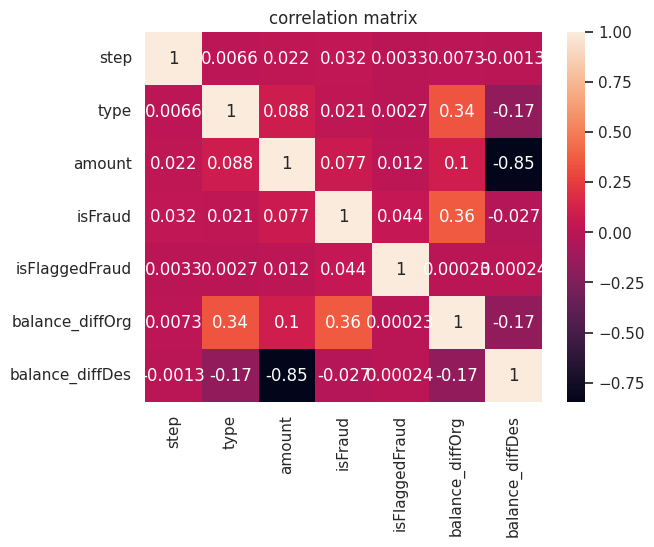

In [32]:
df_corr = df.corr()

sns.heatmap(df_corr,annot=True)
plt.title('correlation matrix')
plt.show()


## Feature Importance Techniques

Feature importance techniques are essential for understanding which variables significantly impact the prediction of a model. In this project, the following methods were utilized:

- **Random Forest**: This ensemble learning method computes feature importance by evaluating the reduction in impurity (like Gini impurity or entropy) for each feature across all trees. Features that lead to greater reductions are deemed more important.

- **Lasso regression:** Lasso Regression can perform feature selection by penalizing the absolute size of the coefficients. Features with coefficients reduced to zero are considered less important and can be excluded from the model.

- **Gradient Boosting**: Similar to Random Forest, this method also ranks features based on their contribution to reducing loss during the boosting process.

- Other Techniques :  **Permutation Importance**, **Coefficients of Linear Models**, **SHAP Values (SHapley Additive exPl

- By using correlation also we can choose featue importances(<0.5)anations)**


- **Domain Knowledge:**

In our fraud detection project, feature selection was crucial for building an effective model. Given the dataset's limited number of features, i opted to leverage domain knowledge to identify the most relevant variables for predicting fraudulent transactions. 

By understanding the context of financial transactions and the factors that may indicate fraud, we were able to select features that align with industry practices and insights. This approach not only streamlined the modeling process but also ensured that the most impactful features were included, enhancing the overall performance and interpretability of the model.

- Removed sender & reciver Id , beacuse they have unique id , which doesnt help in traing our model
- Merged Befors and After transaction balances features to balance of sender & balance of reciver 

# Model Training
# Model Building: A Car Journey

### Splitting the Data

<div style="text-align: right;">
    <img src="https://media.licdn.com/dms/image/C4D12AQEKsyIEPi4XRA/article-cover_image-shrink_600_2000/0/1640838508063?e=2147483647&v=beta&t=HWCnmFHXYqxSFwn8aFyQz1WeYXswV3lr5g47BSvNtPk" alt="" width="700" height="400">
</div>

- we splitting the data and resampling , because our data is highly imbalanced .
- resampling the data by using SMOTE technique

### SMOTE (Synthetic Minority Over-sampling Technique)
**SMOTE** is an oversampling technique used to address class imbalance in machine learning by generating synthetic examples of the minority class.

**Key Features:**
- **Synthetic Sample Generation:** Creates new synthetic instances by interpolating between existing minority class instances and their nearest neighbors.
- **Balancing Classes:** Reduces bias toward the majority class, enhancing the model's ability to learn from the minority class.
- **How it Works:** For each minority class instance, it identifies k nearest neighbors (often k=5) and generates new samples by interpolating between the instance and selected neighbors.

In [19]:
# splitting the data
x = df.drop(['isFraud'],axis=1)
y = df['isFraud']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Applying smote
smote = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

# checking the balance of target
y_train_resampled.value_counts()

isFraud
0    5083503
1    5083503
Name: count, dtype: int64

## Logistic Regression

### Logistic Regression
**Logistic Regression** is a statistical method used for binary classification tasks, modeling the relationship between a binary outcome (0 or 1) and one or more independent variables by estimating probabilities through a logistic function.


<div style="text-align: right;">
    <img src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" alt="" width="550" height="400">
</div>


 **Key Components:**
- **Binary Outcome:** The target variable has two classes (e.g., Yes/No).

- **Logistic Function:** Converts the linear combination of inputs into a probability between 0 and 1.
 
- **Decision Boundary:** Uses a threshold (typically 0.5) to classify predictions into one of the two classes.

- **Loss Function:** Employs Binary Cross-Entropy loss to measure prediction accuracy against actual outcomes.

- **Model Fitting:** Parameters are estimated using Maximum Likelihood Estimation (MLE) to maximize the likelihood of observing the data.

Logistic Regression is widely used for its simplicity and effectiveness in binary classification problems.

In [20]:
# Making model 
log_reg = LogisticRegression()

log_reg.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [21]:
log_reg_pred = log_reg.predict(x_test)

log_reg_acc = accuracy_score(y_test,log_reg_pred)
print(log_reg_acc)

log_reg_report = classification_report(y_test,log_reg_pred)
print(log_reg_report)

0.9007500055008786
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270904
           1       0.01      0.87      0.02      1620

    accuracy                           0.90   1272524
   macro avg       0.51      0.89      0.48   1272524
weighted avg       1.00      0.90      0.95   1272524



### Standardizing vs. Normalizing


<div style="text-align: left;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/0*yGXw2H6jZsR_ROzQ.png" alt="" width="800" height="400">
</div>


**Standardization** is generally preferred for ANNs as it helps with convergence during training, especially when using activation functions like sigmoid or tanh, which are sensitive to the scale of input data.
- Rescales the data to have a mean of 0 and a standard deviation of 1

**Normalization** can also be useful, particularly for ensuring that inputs are bounded between 0 and 1, but it may not handle outliers as effectively.
- Rescales the data to a range between 0 and 1

In [22]:
#  using Standard scaler to standardize the Input for Neural Netwroks
ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train_resampled)
x_test_scaled = ss.transform(x_test)

# Fraud Detection Model
## ANN

### Artificial Neural Networks (ANNs)


<div style="text-align: right;">
    <img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230602113310/Neural-Networks-Architecture.png" alt="" width="700" height="400">
</div>



**Artificial Neural Networks (ANNs)** are machine learning models inspired by the human brain's structure and function. They are widely used for tasks such as classification, regression, and pattern recognition.


**Structure:**

- **Neurons:** Basic units that receive inputs, process them, and produce outputs.
- **Layers:**
    - Input Layer: Receives input data.
    - Hidden Layers: Perform computations; the more layers, the more complex the model.
    - Output Layer: Produces final predictions.

- **Activation Functions:**
     - Sigmoid: For binary outputs.
     - ReLU (Rectified Linear Unit): Commonly used in hidden layers.
     - Softmax: Converts outputs to probabilities for multi-class classification.
- **Forward Propagation:** The process of passing input through the network to generate outputs.

- **Loss Function:** Measures the difference between predicted outputs and actual values, guiding the learning process.
     - Mean Squared Error (MSE): For regression tasks.
     - Binary Cross-Entropy: For binary classification.
- **Backpropagation:** An optimization method that updates the network's weights based on the loss, minimizing it over time.

- **Learning Rate:** A hyperparameter that controls weight updates during training, affecting convergence speed and stability.

In [23]:
# Creating the Architecture of model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# training model
history = model.fit(x_train_scaled, y_train_resampled, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9587 - loss: 0.1023 - val_accuracy: 0.9796 - val_loss: 0.0767
Epoch 2/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9701 - loss: 0.0689 - val_accuracy: 0.9752 - val_loss: 0.0767
Epoch 3/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9710 - loss: 0.0659 - val_accuracy: 0.9805 - val_loss: 0.0771
Epoch 4/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9717 - loss: 0.0642 - val_accuracy: 0.9536 - val_loss: 0.1024
Epoch 5/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9722 - loss: 0.0633 - val_accuracy: 0.9883 - val_loss: 0.0643
Epoch 6/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9726 - loss: 0.0626 - val_accuracy: 0.9805 - val_loss: 0.0731
Epoch 7/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9726 - loss: 0.0624 - val_accuracy: 0.9738 - val_loss: 0.0793
Epoch 8/10
31772/31772 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 

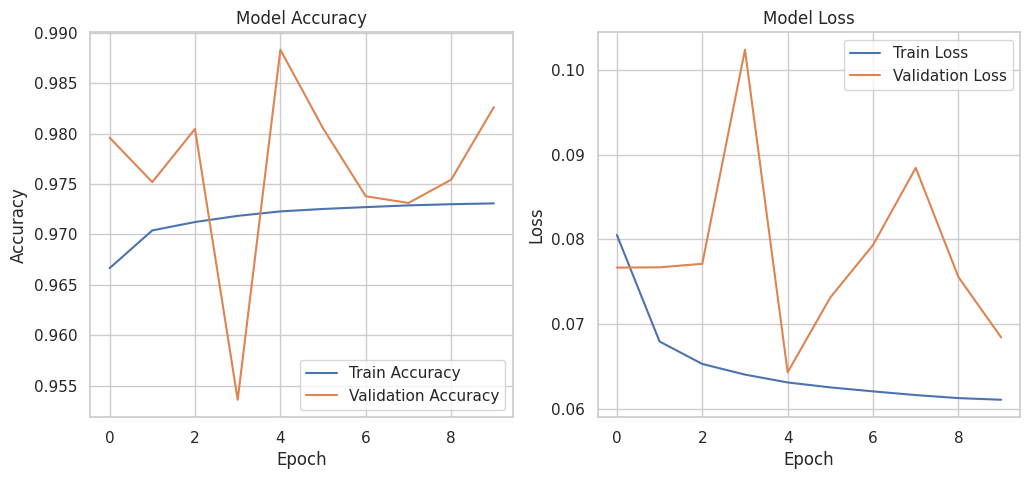

In [25]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

- training accuracy and validation accuracy has increased after 6 epoches
- training and validation loss has decreased after 7 

In [26]:
ann_pred = model.predict(x_test_scaled)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 38s 950us/step


In [27]:
ann_predictions = (ann_pred>0.5).astype('int32')

- we use a threshold value of o.5 to ensure the outcomes are in binary (0 or 1) not in float 

# Model Performance
## Model Evaluation

In [28]:
ann_acc = accuracy_score(y_test,ann_predictions)
print(ann_acc)

ann_report = classification_report(y_test,ann_predictions)
print(ann_report)

0.9692626622366258
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270904
           1       0.04      0.97      0.07      1620

    accuracy                           0.97   1272524
   macro avg       0.52      0.97      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524



### Classification Report Overview

The **classification report** is an essential evaluation tool in machine learning that summarizes the performance of a classification model using key metrics. It provides insights into how well the model predicts different classes, especially in imbalanced datasets.

### Accuracy
-  Accuracy measures the overall correctness of the model by calculating the ratio of correct predictions (both true positives and true negatives) to the total number of predictions.
- Range: 0 to 1
- Values above 0.9 indicate high accuracy, meaning the model correctly predicts a large majority of instances.


### Precision
- Precision measures the accuracy of positive predictions by calculating the ratio of true positives to the total predicted positives.
- Range: 0 to 1
-  Values above 0.9 indicate high precision, meaning most positive predictions are correct.


### Recall
- Recall assesses the model’s ability to identify all actual positive instances by comparing true positives to the total actual positives.
- Range: 0 to 1
- Values above 0.9 indicate high recall, meaning most actual positives are correctly identified.


### F1-Score
- The F1-Score combines precision and recall into a single metric, representing the harmonic mean of both.
- Range: 0 to 1
- Values above 0.9 indicate excellent model performance, reflecting a good balance between precision and recall.

##  Our Model Performance 
-  Accuracy of 97% , which indicates that the model correctly predicts a large majority of cases.
-  the model exhibits high accuracy and performance for class 0, its performance for class 1 is concerning due to very low precision and F1-score. 
- This suggests a potential issue with the model's ability to generalize well for the minority class due high imbalance present in data even after resampling


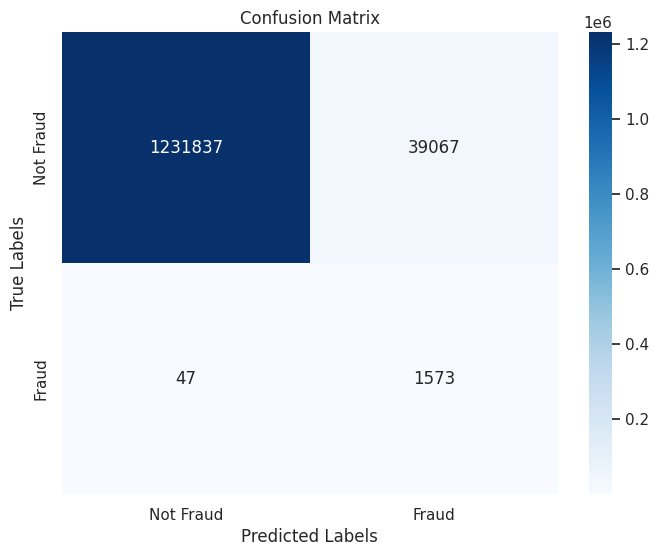

In [29]:
cm = confusion_matrix(y_test, ann_predictions)

#  Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

- **True Positives (TP):** Correctly predicted positive cases (1,231,837 in your example).
- **False Positives (FP):** Incorrectly predicted as positive (39,067).
- **False Negatives (FN):** Incorrectly predicted as negative (47).
- **True Negatives (TN):** Correctly predicted negative cases (1,573). This matrix helps identify areas for improvement in the model, such as high false positive or false negative rates.

### Confusion Matrix
A **Confusion Matrix** is a performance measurement tool for classification models, especially in binary classification. It compares the actual target values with the model's predicted values, providing detailed insights into the number of correct and incorrect predictions.





<div style="text-align: left;">
    <img src="https://plat.ai/wp-content/uploads/Table1-2.png.webp" alt="" width="600" height="400">
</div>




- **True Positive (TP)**: Correctly predicted positive cases.
- **False Positive (FP)**: Incorrectly predicted positive cases (actual negative but predicted positive).
- **False Negative (FN)**: Incorrectly predicted negative cases (actual positive but predicted negative).
- **True Negative (TN)**: Correctly predicted negative cases.

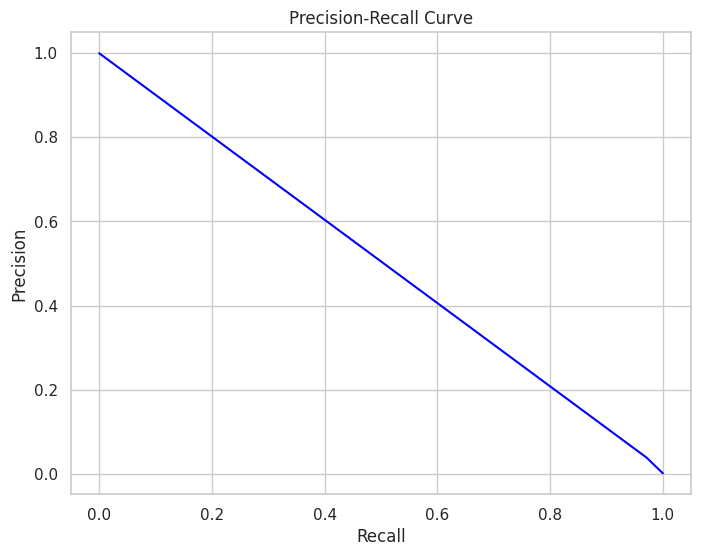

In [30]:
#  Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, ann_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Precision-Recall Curve
**A Precision-Recall** (PR) curve is a useful tool to evaluate the performance of a binary classifier, especially when dealing with imbalanced datasets. It helps to understand the trade-off between precision (the number of true positives over all predicted positives) and recall (the number of true positives over all actual positives) at various threshold levels.

- **Precision**: The proportion of correctly predicted positive instances out of all instances predicted as positive.
          
$$\text{Precision} = \frac{TP}{TP + FP}$$

 
- **Recall**: The proportion of correctly predicted positive instances out of all actual positive instances.

$$\text{Recall} = \frac{TP}{TP + FN}$$

 
- **PR AUC**: The area under the Precision-Recall curve. A higher value indicates better performance, especially for imbalanced datasets.




*In our Model by Observing the flat line of Precision-Recall , we can say our model is balancing the performance constantly* 


# Key Predictors of Fraud
In our fraud detection model, two critical features emerged as key predictors of fraudulent behavior: **transaction amount** and **account balance**.

### 1. **Transaction Amount**
-  The transaction amount serves as a primary indicator of potential fraud. 
-  Larger transaction amounts were strongly correlated with fraudulent activities. For instance, transactions that exceed typical customer behavior often warrant further investigation.
-  Fraudulent transactions typically involve significant sums, making the transaction amount a crucial factor for flagging suspicious behavior.

### 2. **Account Balance**
-  Changes in account balance, particularly fluctuations surrounding transactions, are significant indicators of fraud.
-  Notable increases or decreases in account balances can signal attempts to manipulate or exploit the account, especially when correlated with high-risk transaction types.
-  Rapid changes in balances, especially after large withdrawals or transfers, are often associated with fraudulent activities as individuals attempt to obscure their actions.

Incorporating transaction amount and account balance as key predictors not only enhances the model's predictive accuracy but also aligns with common patterns observed in fraudulent behavior. By focusing on these features, financial institutions can improve their fraud detection capabilities, enabling them to mitigate risks effectively.


# Validity of Factors

The identified factors—transaction amount and account balance—were evaluated for their validity in predicting fraudulent behavior.

### 1. **Transaction Amount**

-  The correlation between transaction amount and fraudulent activity aligns well with existing research and industry observations. Numerous studies have shown that larger transactions are often linked to higher fraud risk, as fraudsters typically aim to maximize their gains in a single attempt. Additionally, financial institutions commonly implement thresholds to flag transactions that exceed typical amounts, reinforcing the importance of this feature.

### 2. **Account Balance**

-  Changes in account balance as a predictor of fraud is also supported by empirical evidence. Research indicates that fluctuations in account balances, especially those that occur suddenly or after significant transactions, can signal fraudulent behavior. This is consistent with the understanding that fraudsters may try to manipulate their account balances to obscure their actions, such as by quickly transferring funds to other accounts. The inclusion of this feature is supported by risk management practices in the financial sector.


Both identified factors make logical sense and are supported by existing research and industry practices. Their relevance in the model enhances its credibility and effectiveness in detecting fraudulent activities, making them valuable components of our fraud detection strategy.


# Infrastructure Updates

To reduce the risk of fraud and boost security, the company should implement key preventative measures when upgrading its infrastructure.

### 1. **Deploy Real-time Fraud Detection Tools**
   -  Implement machine learning-driven systems capable of instantly identifying and flagging suspicious transactions.
   -  Enables quick detection of potential fraudulent actions, reducing the chance for fraud to be executed undetected.

### 2. **Enhance Authentication Procedures**
   -  Introduce multi-factor authentication (MFA) for transaction verifications, requiring additional validation steps like SMS codes or biometrics.
   -  Adds extra security layers, making it more difficult for fraudsters to execute unauthorized transactions.

### 3. **Dynamic Transaction Limits and Monitoring**
   -  Regularly adjust transaction limits based on fraud trends and flag transactions that exceed those limits for further scrutiny.
   - Adaptive thresholds make it easier to detect abnormal transactions, improving the system’s ability to catch potential fraud.

### 4. **Adopt Advanced Anomaly Detection**
   -  Use AI-based anomaly detection systems to track unusual behavioral patterns, such as irregular geographic locations or transaction times.
   -  Detects unusual behavior early, which helps prevent fraudulent activity from progressing.

### 5. **Upgrade Data Encryption and Security Protocols**
   -  Encrypt sensitive information like account details and transaction data to prevent unauthorized access.
   -  Protects customer data from being misused by fraudsters or external threats, ensuring that information remains secure.


# Evaluating Effectiveness

1. **Monitor Key Performance Indicators (KPIs)**
   - by Identifying and tracking key metrics that directly reflect the system’s ability to detect and prevent fraud.
   - KPIs provide a measurable way to determine whether the implemented actions are improving fraud detection without introducing excessive false positives.
   
 2. **Longitudinal Analysis**
    - by  Conducting a long-term comparison of fraud rates before and after the measures were introduced.
    -  A significant reduction in fraud incidents over time would indicate that the measures are successfully preventing fraudulent transactions.
    
 3. **A/B Testing**
    - by Testing the new fraud detection system against the previous system by running both simultaneously on a subset of transactions. Measure the difference in performance between the two systems.
    -  This method provides direct evidence of improvement by comparing real-time fraud detection rates and error rates, helping to refine the model as needed.
    
 4. **Customer Feedback and Incident Reports**
    -  Gather customer feedback and monitor reports of fraud-related issues post-implementation.
    
 **By implementing these Methods we can evaluate the implemented actions**

# Conclusion

This project effectively showcases how **data-driven methods** can enhance the detection of **fraudulent transactions** in the financial sector. By integrating **domain knowledge**, **data cleaning**, and **feature selection**, we developed a robust model that accurately identifies potential fraud, highlighting key factors like **transaction amount** and **account balances**.

Our findings emphasize the need for improved infrastructure, including **real-time monitoring** and **dynamic detection systems**, to proactively combat fraud. Continuous evaluation of these measures will be essential to ensure a secure transactional environment, ultimately safeguarding both institutions and their customers from **financial risks**.


#  Fun Learning

# <center> **Model Building: A Car Journey** 🚗 </center>

---

### Building a model is like designing a car. 🚗💻

<br>

- **Data is the fuel** — The cleaner the fuel, the better the performance. Just like good fuel makes the car run smoothly, high-quality data drives model success. ⛽📊

<br>

- **The model is the engine** — You choose one based on the task, like picking between a sports car engine (complex models) or a fuel-efficient one (simpler models). 🏎️⚙️

<br>

- **Metrics are the dashboard gauges** — They show how well the model is running, just like a speedometer tells you how fast you're going. 📈📉

<br>

- **Hyperparameter tuning is fine-tuning the car** — Adjustments ensure that both the car and the model perform at their best. 🔧🛠️

<br>

- **The final test drive** — You evaluate the model's results, making sure it's ready to hit the road and perform effectively. 🚦🏁

---

<br>

### <center> Ready, set, go! 🚗💨 </center>
